## Load Libraries

In [1]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import collections

from sklearn.cluster import KMeans
from sklearn import preprocessing, neighbors
from numpy import *
from numpy import linalg as la

## Load Data

In [2]:
# Load ratings data

ratings = pd.read_csv('ratings.csv', index_col=0)  # Local file
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
ratings.shape

(100000, 4)

In [4]:
# Load movies data

movies=pd.read_csv('movies.csv', index_col=0)  # Local file
movies.head()

,movie_id,movie_title,rel_date,vid_rel_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
movies.shape

(1682, 24)

In [6]:
movies.columns

Index(['movie_id', 'movie_title', 'rel_date', 'vid_rel_date', 'IMDb_URL',
       'unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [7]:
# Load users data

users=pd.read_csv('users.csv', index_col=0)  # Google colab
users.head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# Exploratory Data Analysis and Cleaning

## Examine missing values

The movies dataset has 1 missing value in the rel_date variable, 1,682 missing values in the vid_rel_date variable (the whole column), and 3 missing values in the IMDb_URL variable. There are no missing values in the users and ratings datasets.

In [8]:
# Number of missing values in the movies dataset
movies.isnull().sum()

movie_id           0
movie_title        0
rel_date           1
vid_rel_date    1682
IMDb_URL           3
unknown            0
Action             0
Adventure          0
Animation          0
Children's         0
Comedy             0
Crime              0
Documentary        0
Drama              0
Fantasy            0
Film-Noir          0
Horror             0
Musical            0
Mystery            0
Romance            0
Sci-Fi             0
Thriller           0
War                0
Western            0
dtype: int64

In [9]:
# Number of missing values in the users dataset
users.isnull().sum()

user_id       0
age           0
gender        0
occupation    0
zipcode       0
dtype: int64

In [10]:
# Number of missing values in the ratings dataset
ratings.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

## Number of unique values for each variable

The chart below shows the number of unique values for each variable. The output indicates we have 1,682 unique movies, 240 unique release dates, 943 unique users, and an ordinal rating scale from 1 to 5.

In [11]:
# Get number of unique values for each variable in movies dataset
dfColumns = []
for i in movies.columns:
    dfColumns.append([i, movies[i].nunique(), movies[i].drop_duplicates().values])
pd.DataFrame(dfColumns, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,movie_id,1682,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,movie_title,1664,"[Toy Story (1995), GoldenEye (1995), Four Room..."
2,rel_date,240,"[01-Jan-1995, 22-Jan-1996, 14-Aug-1995, 30-Oct..."
3,vid_rel_date,0,[nan]
4,IMDb_URL,1660,[http://us.imdb.com/M/title-exact?Toy%20Story%...
5,unknown,2,"[0, 1]"
6,Action,2,"[0, 1]"
7,Adventure,2,"[0, 1]"
8,Animation,2,"[1, 0]"
9,Children's,2,"[1, 0]"


In [12]:
# Get number of unique values for each variable in users dataset
dfColumns = []
for i in users.columns:
    dfColumns.append([i, users[i].nunique(), users[i].drop_duplicates().values])
pd.DataFrame(dfColumns, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,user_id,943,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,age,61,"[24, 53, 23, 33, 42, 57, 36, 29, 39, 28, 47, 4..."
2,gender,2,"[M, F]"
3,occupation,21,"[technician, other, writer, executive, adminis..."
4,zipcode,795,"[85711, 94043, 32067, 43537, 15213, 98101, 913..."


In [13]:
# Get number of unique values for each variable in ratings dataset
dfColumns = []
for i in ratings.columns:
    dfColumns.append([i, ratings[i].nunique(), ratings[i].drop_duplicates().values])
pd.DataFrame(dfColumns, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,user_id,943,"[196, 186, 22, 244, 166, 298, 115, 253, 305, 6..."
1,movie_id,1682,"[242, 302, 377, 51, 346, 474, 265, 465, 451, 8..."
2,rating,5,"[3, 1, 2, 4, 5]"
3,timestamp,49282,"[881250949, 891717742, 878887116, 880606923, 8..."


## Reshape data into users by movies matrix

The ratings dataset was reshaped into a users by movies matrix to prepare it for analysis for the recommender system.

In [14]:
# Append key-value pairs to dictionary

import collections
ratingsDict = {}

for i, j in ratings.iterrows():  # Iterate through the ratings dataframe
    if j['user_id'] in ratingsDict.keys():  # If user_id in ratings dictionary

        userDict = ratingsDict[j['user_id']]  # Add user's rating

        userDict.update({j['movie_id']: j['rating']})

        userDict = collections.OrderedDict(sorted(userDict.items()))  # Sort user dict

        ratingsDict[j['user_id']] = userDict

    else:
        ratingsDict[j['user_id']] = {j['movie_id']: j['rating']}
#ratingsDict

In [15]:
# Sort the keys (user_id's)
import collections
ratingsSorted = collections.OrderedDict(sorted(ratingsDict.items()))
#ratingsSorted

In [16]:
# Add zeroes to unrated items in dictionary

all_ratings = {}

for key, value in ratingsSorted.items():
    userDict = ratingsSorted[key]
    mRange = list(range(1,1683))
    for i in mRange:
        if i in userDict.keys():
            pass
        else:
            userDict[i] = 0
  
    userDictSorted = collections.OrderedDict(sorted(userDict.items()))
    all_ratings[key] = userDictSorted

In [17]:
# Convert from dictionary to Pandas dataframe
cols = np.arange(1,1683,1)

In [18]:
allRatings = pd.DataFrame.from_dict(all_ratings, orient='index', columns=cols)
allRatings.head()

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,5,3,4,3,3,5,4,1,5,3,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Movie Data Exploration

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      1682 non-null   int64  
 1   movie_title   1682 non-null   object 
 2   rel_date      1681 non-null   object 
 3   vid_rel_date  0 non-null      float64
 4   IMDb_URL      1679 non-null   object 
 5   unknown       1682 non-null   int64  
 6   Action        1682 non-null   int64  
 7   Adventure     1682 non-null   int64  
 8   Animation     1682 non-null   int64  
 9   Children's    1682 non-null   int64  
 10  Comedy        1682 non-null   int64  
 11  Crime         1682 non-null   int64  
 12  Documentary   1682 non-null   int64  
 13  Drama         1682 non-null   int64  
 14  Fantasy       1682 non-null   int64  
 15  Film-Noir     1682 non-null   int64  
 16  Horror        1682 non-null   int64  
 17  Musical       1682 non-null   int64  
 18  Mystery       1682 non-null 

In [20]:
# Remove vid_rel_date (all nulls), and IMDb_URL (index variable)
movies = movies.drop(['vid_rel_date', 'IMDb_URL'], axis=1)
movies.head()

,movie_id,movie_title,rel_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Number of movies per genre

Below are the total number of movies per genre. Drama had the highest number of movies (725), followed by comedy (505), Thriller (215) and Adventure (251), and Romance (247). Unknown had the lowest number of movies (2), followed by fantasy (22), and film-noir (24). 

The unknown genre was further examined. There was one movie (index # 266) that had an unknown title, and this movie was removed from the dataset because users would be unable to rate this movie without knowing the title. The other movie with the unknown genre (index # 1372) was kept because the title and release year were provided.

In [21]:
genres = movies.drop(['movie_id','movie_title', 'rel_date'], axis=1)
cols = genres.columns
print(cols)

Index(['unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [22]:
for c in cols:
    print('{:<12} {}'. format(c, sum(genres[c])))

unknown      2
Action       251
Adventure    135
Animation    42
Children's   122
Comedy       505
Crime        109
Documentary  50
Drama        725
Fantasy      22
Film-Noir    24
Horror       92
Musical      56
Mystery      61
Romance      247
Sci-Fi       101
Thriller     251
War          71
Western      27


In [23]:
# Find movie where genre = unknown
movies.index[movies['unknown'] == 1]

Int64Index([266, 1372], dtype='int64')

In [24]:
# Find movie where genre = unknown
print(movies.iloc[[1372]])

      movie_id          movie_title    rel_date  unknown  Action  Adventure  \
1372      1373  Good Morning (1971)  4-Feb-1971        1       0          0   

      Animation  Children's  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  \
1372          0           0       0      0  ...        0          0       0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
1372        0        0        0       0         0    0        0  

[1 rows x 22 columns]


In [25]:
# Find movie where genre = unknown
print(movies.iloc[[266]])

     movie_id movie_title rel_date  unknown  Action  Adventure  Animation  \
266       267     unknown      NaN        1       0          0          0   

     Children's  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  Musical  \
266           0       0      0  ...        0          0       0        0   

     Mystery  Romance  Sci-Fi  Thriller  War  Western  
266        0        0       0         0    0        0  

[1 rows x 22 columns]


In [26]:
# Remove unknown movie, but keep Good Morning.
movies.drop(movies.index[movies['movie_title'] == 'unknown'], inplace=True)

In [27]:
# Also drop movie_id/column index 266 from allRatings dataframe.
allRatings = allRatings.drop(266, 1)

C:\Users\cnaga\AppData\Local\Temp/ipykernel_2312/2533938041.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  allRatings = allRatings.drop(266, 1)


In [28]:
allRatings.shape

(943, 1681)

In [29]:
allRatings.head()

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,5,3,4,3,3,5,4,1,5,3,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Relationships between movie genres
The movie genres are weakly correlated. The highest positive correlation is between the Animation and Children's genres at 0.44, followed by Action and Adventure at 0.34, and Children's and Musical, at 0.33. The highest negative correlation is between Drama and Comedy at -0.34. The remaining correlations are below the absolute value of 0.30.

In [30]:
corrMatrix = genres.corr()
corrMatrix

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
unknown,1.000000,-0.014450,-0.010193,-0.005522,-0.009649,-0.022600,-0.009083,-0.006039,-0.030031,-0.003972,-0.004151,-0.008300,-0.006403,-0.006693,-0.014315,-0.008721,-0.014450,-0.007243,-0.004407
Action,-0.014450,1.000000,0.336875,-0.034942,-0.059222,-0.157842,0.045644,-0.073306,-0.209538,0.010530,-0.050388,-0.005349,-0.040520,-0.000918,-0.055904,0.273404,0.217960,0.086343,0.052720
Adventure,-0.010193,0.336875,1.000000,0.036869,0.271729,-0.107568,-0.015542,-0.051707,-0.195258,0.158589,-0.035541,-0.042189,0.006164,-0.033896,-0.036009,0.238495,0.005247,0.035928,-0.002909
Animation,-0.005522,-0.034942,0.036869,1.000000,0.440034,-0.021696,-0.042126,-0.028011,-0.139289,0.048649,-0.019254,-0.021738,0.331357,-0.031044,-0.044864,0.023704,-0.034942,-0.014646,-0.020440
Children's,-0.009649,-0.059222,0.271729,0.440034,1.000000,0.021859,-0.073615,-0.048949,-0.155460,0.290610,-0.033646,-0.067269,0.216419,-0.017466,-0.090118,-0.003143,-0.110688,-0.047308,-0.017480
Comedy,-0.022600,-0.157842,-0.107568,-0.021696,0.021859,1.000000,-0.088126,-0.107015,-0.337018,0.004507,-0.078808,-0.077703,0.037500,-0.050748,0.083702,-0.094583,-0.223367,-0.053651,-0.011419
Crime,-0.009083,0.045644,-0.015542,-0.042126,-0.073615,-0.088126,1.000000,-0.046076,0.004961,-0.009048,0.171963,-0.031458,-0.048852,0.078114,-0.068274,-0.046203,0.126978,-0.055262,-0.033623
Documentary,-0.006039,-0.073306,-0.051707,-0.028011,-0.048949,-0.107015,-0.046076,1.000000,-0.131142,-0.020150,-0.021059,-0.042104,-0.032483,-0.033955,-0.072619,-0.044240,-0.073306,-0.019335,-0.022357
Drama,-0.030031,-0.209538,-0.195258,-0.139289,-0.155460,-0.337018,0.004961,-0.131142,1.000000,-0.057934,-0.084474,-0.182969,-0.094609,-0.072520,-0.025321,-0.174513,-0.158998,0.044162,-0.063409
Fantasy,-0.003972,0.010530,0.158589,0.048649,0.290610,0.004507,-0.009048,-0.020150,-0.057934,1.000000,-0.013851,-0.027692,-0.021364,-0.022332,-0.018194,0.103058,-0.033528,-0.024168,-0.014704


Text(0.5, 1.0, 'Correlation Heatmap')

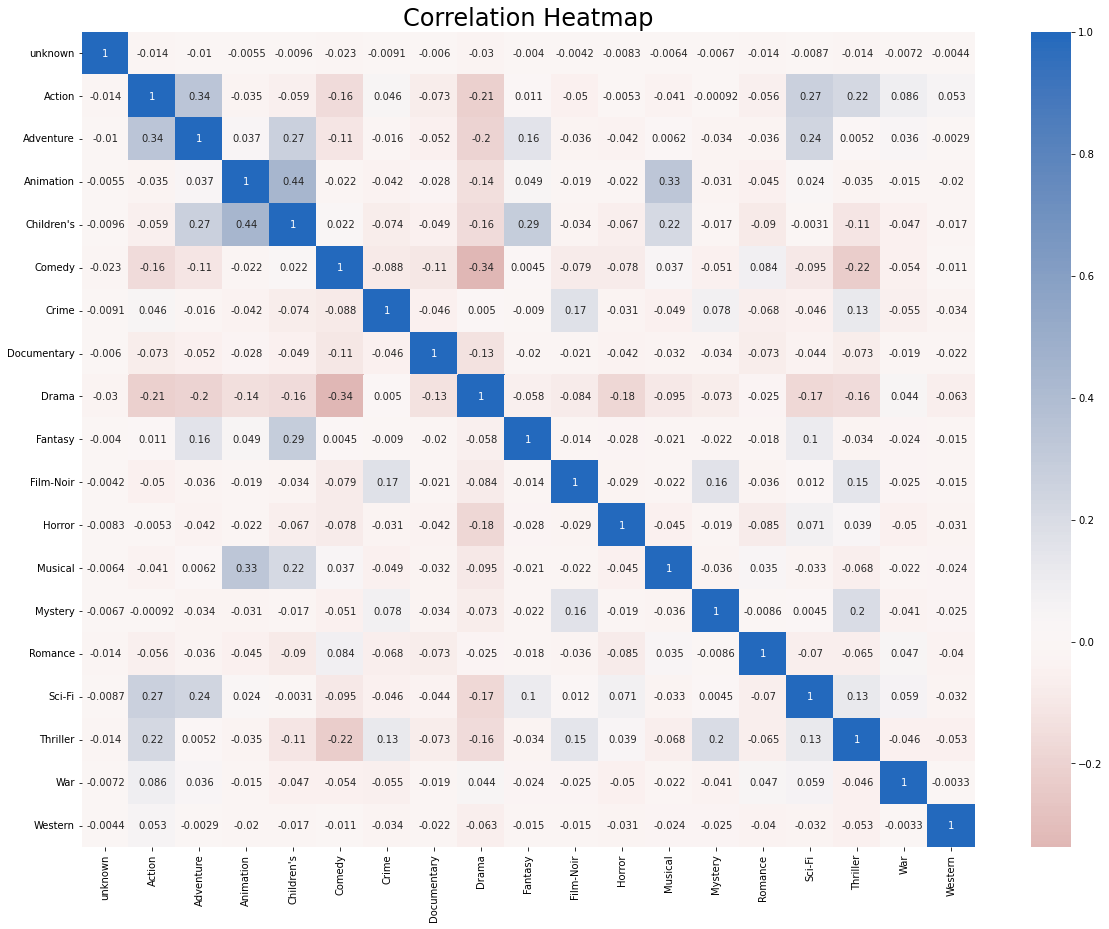

In [31]:
# Create a correlation heatmap
fig = plt.figure(figsize = (20, 15))
sns.heatmap(corrMatrix, annot = True, cmap="vlag_r", center=0)
plt.title("Correlation Heatmap", fontsize=24)

### Movie release year

The movie release date (rel_date) was converted into a new variable, release year (rel_year). The earliest movie in the dataset was released in 1922, and the latest movie in the dataset was released in 1998, which is over 20 years ago. The mean year is 1989, with a standard deviation of 14 years, and the median year is 1995, reflecting this left skew.

In [32]:
# Add release year column to movies dataframe
movies['rel_year'] = movies['rel_date'].str[-4:]

uniq = movies['rel_year'].unique()
print(uniq)

['1995' '1996' '1994' '1967' '1977' '1993' '1965' '1982' '1990' '1992'
 '1991' '1937' '1997' '1981' '1970' '1972' '1961' '1939' '1941' '1968'
 '1969' '1954' '1971' '1988' '1973' '1979' '1987' '1986' '1989' '1974'
 '1980' '1985' '1966' '1957' '1960' '1984' '1983' '1975' '1998' '1940'
 '1950' '1964' '1951' '1962' '1933' '1956' '1963' '1958' '1945' '1976'
 '1978' '1959' '1942' '1953' '1946' '1955' '1938' '1934' '1949' '1948'
 '1943' '1944' '1936' '1935' '1930' '1952' '1931' '1922' '1947' '1932'
 '1926']


In [33]:
# Set rel_year to int
movies['rel_year'] = movies['rel_year'].astype(int)

In [34]:
movies['rel_year'].describe()

count    1681.00000
mean     1989.38608
std        14.25358
min      1922.00000
25%      1993.00000
50%      1995.00000
75%      1996.00000
max      1998.00000
Name: rel_year, dtype: float64

### Number of ratings per movie

The number of ratings per movie was calculated and added to the movies dataframe as a new feature. The number of ratings per movie had a mean of 59, with a standard deviation of 80, and a median of 27 ratings per movie. The maximum number of ratings was 583, and the minimum number of ratings per movie was 1.

In [35]:
# Convert usersRatings to data matrix
data = mat(allRatings)

In [36]:
M = data.shape[0]
N = data.shape[1]
#print(M)  # 943 users
#print(N)  # 1681 movies

In [37]:
# Get number of ratings for each movie
numRatings = []
for i in range(N):
    count = 0
    for j in range(M):
        if data[j,i] !=0:
            count += 1
    numRatings.append(count)
#print(numRatings)

In [38]:
movies['numMovieRatings'] = numRatings

In [39]:
movies['numMovieRatings'].describe()

count    1681.000000
mean       59.467579
std        80.405551
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: numMovieRatings, dtype: float64

### Sorted dataframe by number of ratings

The movies dataframe was sorted by number of reviews. Star Wars had the highest number of ratings (583), followed by Contact (509), and there were over 140 movies that had 1 rating.

In [40]:
movies_sortedNumReviews = movies.sort_values(by=['numMovieRatings'], ascending=False)
movies_sortedNumReviews.head(5)

,movie_id,movie_title,rel_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rel_year,numMovieRatings
49,50,Star Wars (1977),01-Jan-1977,0,1,1,0,0,0,0,...,0,0,0,1,1,0,1,0,1977,583
257,258,Contact (1997),11-Jul-1997,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1997,509
99,100,Fargo (1996),14-Feb-1997,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1997,508
180,181,Return of the Jedi (1983),14-Mar-1997,0,1,1,0,0,0,0,...,0,0,0,1,1,0,1,0,1997,507
293,294,Liar Liar (1997),21-Mar-1997,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1997,485


In [70]:
movies_sortedNumReviews.tail(145)

,movie_id,movie_title,rel_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rel_year,numMovieRatings
912,913,Love and Death on Long Island (1997),10-Mar-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1998,2
1466,1467,"Saint of Fort Washington, The (1993)",01-Jan-1993,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1993,2
1480,1481,S.F.W. (1994),01-Jan-1994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1994,2
1476,1477,Nightwatch (1997),22-Apr-1997,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1997,2
1620,1621,Butterfly Kiss (1995),26-Apr-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,1576,"Hungarian Fairy Tale, A (1987)",01-Jan-1987,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1987,1
1576,1577,"Death in the Garden (Mort en ce jardin, La) (1...",01-Jan-1956,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1956,1
1347,1348,Every Other Weekend (1990),01-Jan-1990,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1990,1
1578,1579,Baton Rouge (1988),01-Jan-1988,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1988,1


### Average rating for each movie

The average rating for each movie was calculated and appended as a new feature to the movies dataframe. The mean average rating was 3.08 with a standard deviation of 0.78. The minimum rating was 1, the maximum rating was 5, and the median average rating was 3.161. 

In [41]:
totRatings = []
for i in range(N):
    count = 0
    for j in range(M):
        count += data[j,i]
    totRatings.append(count)
#print(totRatings)

In [42]:
avgRatings=[]
for i in range(len(totRatings)):
    avg = totRatings[i]/numRatings[i]
    avgRatings.append(round(avg,4))
#print(avgRatings)

In [43]:
movies['avgRating'] = avgRatings

In [44]:
movies['avgRating'].describe()

count    1681.000000
mean        3.076259
std         0.781844
min         1.000000
25%         2.659300
50%         3.161800
75%         3.653800
max         5.000000
Name: avgRating, dtype: float64

In [45]:
# Get movies sorted by average rating
movies_sortedRatings = movies.sort_values(by=['avgRating'], ascending=False)
movies_sortedRatings.head(20)

,movie_id,movie_title,rel_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rel_year,numMovieRatings,avgRating
1535,1536,Aiqing wansui (1994),22-Jul-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1996,1,5.0000
1466,1467,"Saint of Fort Washington, The (1993)",01-Jan-1993,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1993,2,5.0000
1121,1122,They Made Me a Criminal (1939),01-Jan-1939,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1939,1,5.0000
1598,1599,Someone Else's America (1995),10-May-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1996,1,5.0000
1652,1653,Entertaining Angels: The Dorothy Day Story (1996),27-Sep-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1996,1,5.0000
1292,1293,Star Kid (1997),16-Jan-1998,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1998,3,5.0000
1499,1500,Santa with Muscles (1996),08-Nov-1996,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1996,2,5.0000
813,814,"Great Day in Harlem, A (1994)",01-Jan-1994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1994,1,5.0000
1200,1201,Marlene Dietrich: Shadow and Light (1996),02-Apr-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1996,1,5.0000
1188,1189,Prefontaine (1997),24-Jan-1997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1997,3,5.0000


### Sorted dataframe for movies with more than 50 reviews

Many of the top rated (4.5+) movies had very few reviews, making the movie's average rating unreliable. Thus, the movies dataframe was subset to movies that have at least 50 ratings and resorted by average rating. There were 603 movies with at least 50 ratings, and the highest rated movies were A Close Shave (4.49) and Schindler's List (4.47). 

In [46]:
movies_sorted50Ratings = movies.drop(movies.index[movies['numMovieRatings'] < 50])
print(len(movies_sorted50Ratings))

603


In [47]:
movies_sorted50Ratings = movies_sorted50Ratings.sort_values(by=['avgRating'], ascending=False)
movies_sorted50Ratings.head(5)

,movie_id,movie_title,rel_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rel_year,numMovieRatings,avgRating
407,408,"Close Shave, A (1995)",28-Apr-1996,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1996,112,4.4911
317,318,Schindler's List (1993),01-Jan-1993,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1993,298,4.4664
168,169,"Wrong Trousers, The (1993)",01-Jan-1993,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1993,118,4.4661
482,483,Casablanca (1942),01-Jan-1942,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1942,243,4.4568
113,114,Wallace & Gromit: The Best of Aardman Animatio...,05-Apr-1996,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1996,67,4.4478


## User Data Exploration

### Number of ratings per user

The number of ratings per unique user was calculated and appended to the users dataframe as a new feature. The mean number of ratings was 106, with a standard deviation of 101. The minimum number of ratings per user was 20, the maximum number of ratings was 737, and the median was 65. The minimum number of ratings per user was used as the standard to determine the number of ratings the recommender system application would require from new users to create a vector that could adequately predict the new user's ratings on unrated movies.

In [48]:
numUserRatings = []

M = data.shape[0]
N = data.shape[1]
#print(M)  # 943 users
#print(N)  # 1681 movies

for i in range(M):
    count = 0
    for j in range(N):
        if data[i, j] != 0:
            count+=1
    numUserRatings.append(count)

#print(len(numUserRatings))

In [49]:
users['numUserRatings'] = numUserRatings

In [50]:
users['numUserRatings'].describe()

count    943.000000
mean     106.007423
std      100.916264
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: numUserRatings, dtype: float64

## Data Visualization

Below are histograms of the movie's release year, number of ratings per movie, and average rating. The distribution of release year is heavily left skewed, with most of the movies being released closer to 1998. The distribution of number of ratings per movie is heavily right skewed, with over 600 movies in the lowest bin. Average movie rating is approximately normally distributed; however, there appears to be a second mode at average rating = 1.

### Distribution of Movie Variables

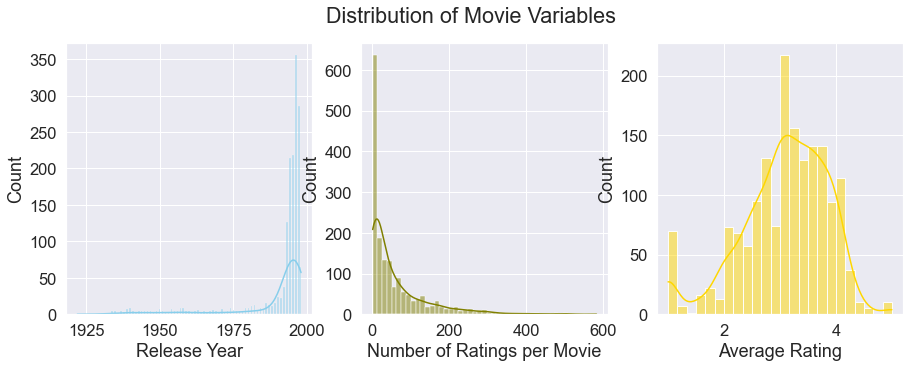

In [51]:
sns.set(font_scale = 1.5)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle('Distribution of Movie Variables')

axs[0].set_xlabel("Release Year")
sns.histplot(data=movies, x="rel_year", kde=True, color="skyblue", ax=axs[0])

axs[1].set_xlabel("Number of Ratings per Movie")
sns.histplot(data=movies, x="numMovieRatings", kde=True, color="olive", ax=axs[1])

axs[2].set_xlabel("Average Rating")
sns.histplot(data=movies, x="avgRating", kde=True, color="gold", ax=axs[2])

plt.show()

### Distribution of User Variables

Below are the distribution of user variables age, number of ratings per user, gender, and occupation.  Age appears approximately normally distributed.  Number of ratings per user is heavily right skewed, with over 300 ratings in the lowest bin. There were more than double the number of males as females in the dataset, and the most common user occupation was student.

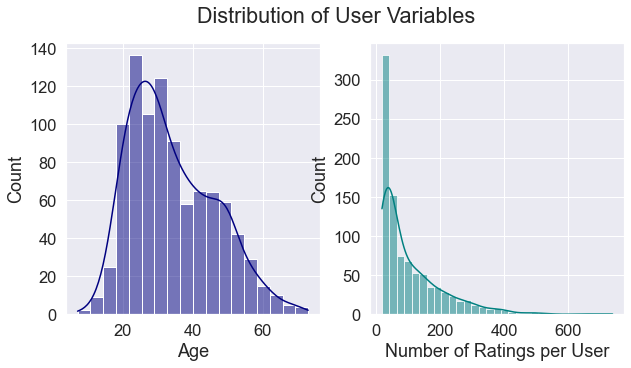

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Distribution of User Variables')

axs[0].set_xlabel("Age")
sns.histplot(data=users, x="age", kde=True, color="navy", ax=axs[0])

axs[1].set_xlabel("Number of Ratings per User")
sns.histplot(data=users, x="numUserRatings", kde=True, color="teal", ax=axs[1])

plt.show()


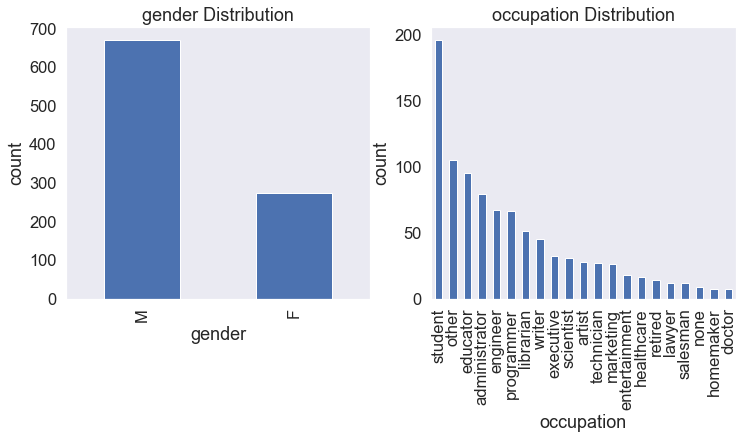

In [75]:
userSubset = users[['gender', 'occupation']]
fig = plt.figure(figsize = (12, 5))

j = 1
for i in userSubset.columns:
    
    userFeatureCounts = users[i].value_counts()
    userFeatureCounts
    
    ax1 = fig.add_subplot(1, 2, j)
    ax1.set_xlabel(i)
    ax1.set_ylabel('count')
    ax1.set_title(i + " Distribution")
    userFeatureCounts.plot(kind='bar', grid = False)
 
    j += 1
    fig.tight_layout

## Write dataframes to .csv files

The cleaned and transformed datasets are written to .csv files to be read in by the next notebook, 'movie_lens_model_building.ipynb'.

In [54]:
# allRatings (users by movies data matrix)

from pathlib import Path  
filepath = Path('/Users/cnaga/Documents/movie_recommender/allRatings.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
allRatings.to_csv(filepath) 

In [55]:
allRatings = pd.read_csv('/Users/cnaga/Documents/movie_recommender/allRatings.csv', index_col=0)
allRatings.head()

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,5,3,4,3,3,5,4,1,5,3,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# movies
filepath = Path('/Users/cnaga/Documents/movie_recommender/movies2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True) 
movies.to_csv(filepath)

In [57]:
movies = pd.read_csv('/Users/cnaga/Documents/movie_recommender/movies2.csv', index_col=0)
movies.head()

,movie_id,movie_title,rel_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rel_year,numMovieRatings,avgRating
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1995,452,3.8783
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1995,131,3.2061
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1995,90,3.0333
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1995,209,3.5502
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1995,86,3.3023


In [58]:
# movies sorted by number of reviews
filepath = Path('/Users/cnaga/Documents/movie_recommender/movies2_sortedNumReviews.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True) 
movies_sortedNumReviews.to_csv(filepath)


In [59]:
movies_sortedNumReviews = pd.read_csv('/Users/cnaga/Documents/movie_recommender/movies2_sortedNumReviews.csv', index_col=0)
movies_sortedNumReviews.head()

,movie_id,movie_title,rel_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rel_year,numMovieRatings
49,50,Star Wars (1977),01-Jan-1977,0,1,1,0,0,0,0,...,0,0,0,1,1,0,1,0,1977,583
257,258,Contact (1997),11-Jul-1997,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1997,509
99,100,Fargo (1996),14-Feb-1997,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1997,508
180,181,Return of the Jedi (1983),14-Mar-1997,0,1,1,0,0,0,0,...,0,0,0,1,1,0,1,0,1997,507
293,294,Liar Liar (1997),21-Mar-1997,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1997,485


In [60]:
# movies sorted by average rating
filepath = Path('/Users/cnaga/Documents/movie_recommender/movies2_sortedRatings.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True) 
movies_sortedRatings.to_csv(filepath)


In [61]:
movies_sortedRatings = pd.read_csv('/Users/cnaga/Documents/movie_recommender/movies2_sortedRatings.csv', 
                                   index_col=0)
movies_sortedRatings.head()

,movie_id,movie_title,rel_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rel_year,numMovieRatings,avgRating
1535,1536,Aiqing wansui (1994),22-Jul-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1996,1,5.0
1466,1467,"Saint of Fort Washington, The (1993)",01-Jan-1993,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1993,2,5.0
1121,1122,They Made Me a Criminal (1939),01-Jan-1939,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1939,1,5.0
1598,1599,Someone Else's America (1995),10-May-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1996,1,5.0
1652,1653,Entertaining Angels: The Dorothy Day Story (1996),27-Sep-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1996,1,5.0


In [62]:
# movies with more than 50 ratings, sorted by average rating

filepath = Path('/Users/cnaga/Documents/movie_recommender/movies2_sorted50Ratings.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True) 
movies_sorted50Ratings.to_csv(filepath)


In [63]:
movies_sorted50Ratings = pd.read_csv('/Users/cnaga/Documents/movie_recommender/movies2_sorted50Ratings.csv',
                                    index_col=0)
movies_sorted50Ratings.head()

,movie_id,movie_title,rel_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rel_year,numMovieRatings,avgRating
407,408,"Close Shave, A (1995)",28-Apr-1996,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1996,112,4.4911
317,318,Schindler's List (1993),01-Jan-1993,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1993,298,4.4664
168,169,"Wrong Trousers, The (1993)",01-Jan-1993,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1993,118,4.4661
482,483,Casablanca (1942),01-Jan-1942,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1942,243,4.4568
113,114,Wallace & Gromit: The Best of Aardman Animatio...,05-Apr-1996,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1996,67,4.4478
